In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
# Reading in all of our data for each year
aqi_2015_df = pd.read_csv("Resources/aqi_2015.csv")
aqi_2016_df = pd.read_csv("Resources/aqi_2016.csv")
aqi_2017_df = pd.read_csv("Resources/aqi_2017.csv")
aqi_2018_df = pd.read_csv("Resources/aqi_2018.csv")
aqi_2019_df = pd.read_csv("Resources/aqi_2019.csv")
aqi_2020_df = pd.read_csv("Resources/aqi_2020.csv")
aqi_all_df = pd.read_csv("Resources/annual_aqi_all.csv")

In [4]:
aqi_2015_df.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,Alabama,Baldwin,2015,264,230,33,1,0,0,0,129,53,38,0,0,189,0,75,0
1,Alabama,Clay,2015,112,101,11,0,0,0,0,91,50,32,0,0,0,0,112,0
2,Alabama,Colbert,2015,280,251,29,0,0,0,0,73,51,36,0,0,195,0,85,0
3,Alabama,DeKalb,2015,363,319,43,1,0,0,0,101,52,37,0,0,307,0,56,0
4,Alabama,Elmore,2015,233,223,9,1,0,0,0,115,47,35,0,0,233,0,0,0


In [5]:
# Eric's Code Starts Here 

In [6]:
# Cleaning the data

In [7]:
# Drop any Max AQI's that are greater than 500 for each year
indexes = aqi_2015_df[aqi_2015_df["Max AQI"] > 500].index
aqi_2015_df = aqi_2015_df.drop(indexes)

In [8]:
indexes = aqi_2016_df[aqi_2016_df["Max AQI"] > 500].index
aqi_2016_df = aqi_2016_df.drop(indexes)

In [9]:
indexes = aqi_2017_df[aqi_2017_df["Max AQI"] > 500].index
aqi_2017_df = aqi_2017_df.drop(indexes)

In [10]:
indexes = aqi_2018_df[aqi_2018_df["Max AQI"] > 500].index
aqi_2018_df = aqi_2018_df.drop(indexes)

In [11]:
indexes = aqi_2019_df[aqi_2019_df["Max AQI"] > 500].index
aqi_2019_df = aqi_2019_df.drop(indexes)

In [12]:
indexes = aqi_2020_df[aqi_2020_df["Max AQI"] > 500].index
aqi_2020_df = aqi_2020_df.drop(indexes)

In [13]:
# Getting the mean AQI, by state, for each year

In [14]:
mean_aqi_2015 = aqi_2015_df.groupby("State")["Median AQI"].mean()
mean_aqi_2015_df = pd.DataFrame(mean_aqi_2015)

In [15]:
mean_aqi_2016 = aqi_2016_df.groupby("State")["Median AQI"].mean()
mean_aqi_2016_df = pd.DataFrame(mean_aqi_2016)

In [16]:
mean_aqi_2017 = aqi_2017_df.groupby("State")["Median AQI"].mean()
mean_aqi_2017_df = pd.DataFrame(mean_aqi_2017)

In [17]:
mean_aqi_2018 = aqi_2018_df.groupby("State")["Median AQI"].mean()
mean_aqi_2018_df = pd.DataFrame(mean_aqi_2018)

In [18]:
mean_aqi_2019 = aqi_2019_df.groupby("State")["Median AQI"].mean()
mean_aqi_2019_df = pd.DataFrame(mean_aqi_2019)

In [19]:
mean_aqi_2020 = aqi_2020_df.groupby("State")["Median AQI"].mean()
mean_aqi_2020_df = pd.DataFrame(mean_aqi_2020)

In [20]:
# Merging each mean AQI for each year into a single DataFrame
mean_aqi_by_year_df = pd.merge(mean_aqi_2015_df, mean_aqi_2016_df, how='left', on='State')
mean_aqi_by_year_df = mean_aqi_by_year_df.rename(columns={"Median AQI_x": "2015", "Median AQI_y": "2016"})

In [21]:
mean_aqi_by_year_df = pd.merge(mean_aqi_by_year_df, mean_aqi_2017_df, how='left', on='State')
mean_aqi_by_year_df = mean_aqi_by_year_df.rename(columns={"Median AQI": "2017"})

In [22]:
mean_aqi_by_year_df = pd.merge(mean_aqi_by_year_df, mean_aqi_2018_df, how='left', on='State')
mean_aqi_by_year_df = mean_aqi_by_year_df.rename(columns={"Median AQI": "2018"})

In [23]:
mean_aqi_by_year_df = pd.merge(mean_aqi_by_year_df, mean_aqi_2019_df, how='left', on='State')
mean_aqi_by_year_df = mean_aqi_by_year_df.rename(columns={"Median AQI": "2019"})

In [24]:
mean_aqi_by_year_df = pd.merge(mean_aqi_by_year_df, mean_aqi_2020_df, how='left', on='State')
mean_aqi_by_year_df = mean_aqi_by_year_df.rename(columns={"Median AQI": "2020"})

In [25]:
# mean AQI for each state by each year
mean_aqi_by_year_df.head()

,2015,2016,2017,2018,2019,2020
State,,,,,,
Alabama,39.333333,39.388889,38.277778,36.411765,38.647059,34.333333
Alaska,23.125000,24.142857,22.000000,22.000000,19.222222,16.333333
Arizona,42.000000,43.750000,47.230769,43.083333,41.083333,42.769231
Arkansas,32.454545,33.545455,37.090909,35.416667,36.153846,33.454545
California,50.307692,46.750000,49.680000,49.470588,43.448980,42.060000


In [26]:
# Getting the Mean AQI for the United States for each year 
mean_aqi_2015 = mean_aqi_by_year_df["2015"].mean()
mean_aqi_2016 = mean_aqi_by_year_df["2016"].mean()
mean_aqi_2017 = mean_aqi_by_year_df["2017"].mean()
mean_aqi_2018 = mean_aqi_by_year_df["2018"].mean()
mean_aqi_2019 = mean_aqi_by_year_df["2019"].mean()
mean_aqi_2020 = mean_aqi_by_year_df["2020"].mean()

In [27]:
mean_aqi_df = pd.DataFrame({"2015": [mean_aqi_2015],
                            "2016": mean_aqi_2016, 
                            "2017": mean_aqi_2017,
                            "2018": mean_aqi_2018,
                            "2019": mean_aqi_2019, 
                            "2020": mean_aqi_2020
                           })
mean_aqi_df

,2015,2016,2017,2018,2019,2020
0,36.366804,35.189719,35.519398,34.904436,34.121142,32.633757


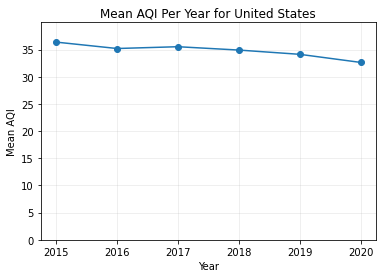

In [28]:
# Plotting the mean AQI per year as a line chart
years = mean_aqi_df.keys()
mean_aqi = mean_aqi_df.mean()

plt.plot(years, mean_aqi, label='Mean AQI', marker='o')
plt.ylim(0, 40)
y_ticks = np.arange(0,40,5)
plt.yticks(y_ticks)
plt.grid(alpha=.25)
plt.title("Mean AQI Per Year for United States")
plt.xlabel("Year")
plt.ylabel("Mean AQI")
plt.savefig("Images/Mean_AQI_Per_Year.png")
plt.show()

In [29]:
# Testing our hypothesis

In [30]:
# Mean AQI for each of the years we want to test
group1 = mean_aqi_by_year_df["2015"]
group2 = mean_aqi_by_year_df["2016"]
group3 = mean_aqi_by_year_df["2017"]
group4 = mean_aqi_by_year_df["2018"]
group5 = mean_aqi_by_year_df["2019"]
group6 = mean_aqi_by_year_df["2020"]

In [31]:
# Performing the ANOVA across our groups
stats.f_oneway(group1,group2,group3,group4,group5,group6)


F_onewayResult(statistic=1.8365301412865318, pvalue=0.10533091292894199)

In [32]:
# Performing the ANOVA across our groups
stats.f_oneway(group1,group2,group3,group4,group5)

F_onewayResult(statistic=0.733509622878608, pvalue=0.5697943051513251)

In [33]:
#More hypothesis testing at bottom of notebook

In [34]:
# Getting the days with Ozone as main pollutant for each state
days_ozone_2015 = aqi_2015_df.groupby('State')['Days Ozone'].mean()
days_ozone_2016 = aqi_2016_df.groupby('State')['Days Ozone'].mean()
days_ozone_2017 = aqi_2017_df.groupby('State')['Days Ozone'].mean()
days_ozone_2018 = aqi_2018_df.groupby('State')['Days Ozone'].mean()
days_ozone_2019 = aqi_2019_df.groupby('State')['Days Ozone'].mean()
days_ozone_2020 = aqi_2020_df.groupby('State')['Days Ozone'].mean()

In [35]:
# Merge all 'Days ozone' data by year into a single DataFrame
days_ozone_df = pd.merge(days_ozone_2015, days_ozone_2016, how='left', on='State')
days_ozone_df = days_ozone_df.rename(columns={'Days Ozone_x': '2015', 'Days Ozone_y': '2016'})

In [36]:
days_ozone_df = pd.merge(days_ozone_df, days_ozone_2017, how='left', on='State')
days_ozone_df = days_ozone_df.rename(columns={'Days Ozone': '2017'})

In [37]:
days_ozone_df = pd.merge(days_ozone_df, days_ozone_2018, how='left', on='State')
days_ozone_df = days_ozone_df.rename(columns={'Days Ozone': '2018'})

In [38]:
days_ozone_df = pd.merge(days_ozone_df, days_ozone_2019, how='left', on='State')
days_ozone_df = days_ozone_df.rename(columns={'Days Ozone': '2019'})

In [39]:
days_ozone_df = pd.merge(days_ozone_df, days_ozone_2020, how='left', on='State')
days_ozone_df = days_ozone_df.rename(columns={'Days Ozone': '2020'})

In [40]:
days_ozone_df.head()

,2015,2016,2017,2018,2019,2020
State,,,,,,
Alabama,137.555556,156.111111,153.444444,159.705882,163.470588,102.733333
Alaska,78.875000,105.714286,98.428571,87.125000,53.333333,35.111111
Arizona,198.416667,199.916667,192.769231,214.416667,229.833333,176.692308
Arkansas,157.727273,165.545455,140.272727,131.083333,121.923077,112.818182
California,217.461538,227.019231,215.860000,205.000000,248.530612,152.920000


In [41]:
# Get the mean 'Days Ozone' pollution for each year within the United States
ozone_2015 = days_ozone_df['2015'].mean()
ozone_2015

160.6575603827801

In [42]:
ozone_2016 = days_ozone_df['2016'].mean()
ozone_2016

172.7316386653196

In [43]:
ozone_2017 = days_ozone_df['2017'].mean()
ozone_2017

171.7369542417005

In [44]:
ozone_2018 = days_ozone_df['2018'].mean()
ozone_2018

173.61385275198643

In [45]:
ozone_2019 = days_ozone_df['2019'].mean()
ozone_2019

179.06615261873728

In [46]:
ozone_2020 = days_ozone_df['2020'].mean()
ozone_2020

121.4795238843221

In [47]:
# Create a dataframe of all the mean Ozone days
mean_ozone_df = pd.DataFrame({"2015": [ozone_2015],
                            "2016": ozone_2016, 
                            "2017": ozone_2017,
                            "2018": ozone_2018,
                            "2019": ozone_2019, 
                            "2020": ozone_2020
                           })
mean_ozone_df

,2015,2016,2017,2018,2019,2020
0,160.65756,172.731639,171.736954,173.613853,179.066153,121.479524


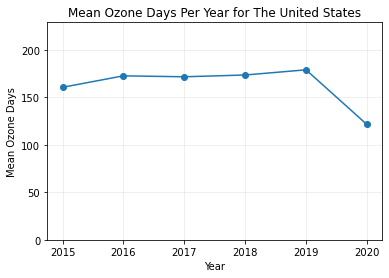

In [48]:
# Plotting the Number of days Ozone per year as a line chart
mean_ozone = mean_ozone_df.mean()

plt.plot(years, mean_ozone, label='Mean AQI', marker='o')
plt.ylim(0, mean_ozone.max()+50)
plt.grid(alpha=.25)
plt.title("Mean Ozone Days Per Year for The United States")
plt.xlabel("Year")
plt.ylabel("Mean Ozone Days")
plt.savefig("Images/Days_Ozone_Per_Year")
plt.show()

In [49]:
# Eric Code Ends

In [50]:
# Alex's Code Starts Here

In [51]:
# QUESTION 1 - NUMBER OF GOOD DAYS 
#--------------------------------------------------

#Create DF for each year's data
# 2015 --
#Extract the following columns: "State", "County", "Year", "Days with AQI", "Good Days"
GoodDays_2015_df = aqi_2015_df[["State", "County", "Year",
                           "Days with AQI", "Good Days", "Unhealthy Days"]]

# 2016 --
#Extract the following columns: "State", "County", "Year", "Days with AQI", "Good Days"
GoodDays_2016_df = aqi_2016_df[["State", "County", "Year",
                           "Days with AQI", "Good Days", "Unhealthy Days"]]

# 2017 --
#Extract the following columns: "State", "County", "Year", "Days with AQI", "Good Days"
GoodDays_2017_df = aqi_2017_df[["State", "County", "Year",
                           "Days with AQI", "Good Days", "Unhealthy Days"]]

# 2018 --
#Extract the following columns: "State", "County", "Year", "Days with AQI", "Good Days"
GoodDays_2018_df = aqi_2018_df[["State", "County", "Year",
                           "Days with AQI", "Good Days", "Unhealthy Days"]]

# 2019 --
#Extract the following columns: "State", "County", "Year", "Days with AQI", "Good Days"
GoodDays_2019_df = aqi_2019_df[["State", "County", "Year",
                           "Days with AQI", "Good Days", "Unhealthy Days"]]

# 2020 --
#Extract the following columns: "State", "County", "Year", "Days with AQI", "Good Days"
GoodDays_2020_df = aqi_2020_df[["State", "County", "Year",
                           "Days with AQI", "Good Days", "Unhealthy Days"]]

GoodDays_2020_df.head()

,State,County,Year,Days with AQI,Good Days,Unhealthy Days
0,Alabama,Baldwin,2020,168,159,0
1,Alabama,Clay,2020,58,54,0
2,Alabama,DeKalb,2020,242,234,0
3,Alabama,Elmore,2020,149,149,0
4,Alabama,Etowah,2020,169,161,0


In [52]:
#Calculate percentage of good days out of total days with aqi-
GoodDays_2015_df['Percent of Good Days'] = (GoodDays_2015_df['Good Days'] / GoodDays_2015_df['Days with AQI']) * 100
GoodDays_2016_df['Percent of Good Days'] = (GoodDays_2016_df['Good Days'] / GoodDays_2016_df['Days with AQI']) * 100
GoodDays_2017_df['Percent of Good Days'] = (GoodDays_2017_df['Good Days'] / GoodDays_2017_df['Days with AQI']) * 100
GoodDays_2018_df['Percent of Good Days'] = (GoodDays_2018_df['Good Days'] / GoodDays_2018_df['Days with AQI']) * 100
GoodDays_2019_df['Percent of Good Days'] = (GoodDays_2019_df['Good Days'] / GoodDays_2019_df['Days with AQI']) * 100
GoodDays_2020_df['Percent of Good Days'] = (GoodDays_2020_df['Good Days'] / GoodDays_2020_df['Days with AQI']) * 100


In [53]:
#Find the Average Percent for each year
avg_pct_2015= GoodDays_2015_df['Percent of Good Days'].mean()
avg_pct_2016= GoodDays_2016_df['Percent of Good Days'].mean()
avg_pct_2017= GoodDays_2017_df['Percent of Good Days'].mean()
avg_pct_2018= GoodDays_2018_df['Percent of Good Days'].mean()
avg_pct_2019= GoodDays_2019_df['Percent of Good Days'].mean()
avg_pct_2020= GoodDays_2020_df['Percent of Good Days'].mean()


#Create new Dictionary that includes these calculations
avg_pct_by_year_dict = {"Average Percent 2015" : [avg_pct_2015],
                   "Average Percent 2016" : [avg_pct_2016],
                   "Average Percent 2017" : [avg_pct_2017],
                   "Average Percent 2018" : [avg_pct_2018],
                   "Average Percent 2019" : [avg_pct_2019],
                   "Average Percent 2020" : [avg_pct_2020]}

#Turn dictionary into new DF
GoodDay_pct_df = pd.DataFrame(avg_pct_by_year_dict)
GoodDay_pct_df.head()


,Average Percent 2015,Average Percent 2016,Average Percent 2017,Average Percent 2018,Average Percent 2019,Average Percent 2020
0,80.751512,83.524178,82.301617,81.365455,84.853219,88.346373


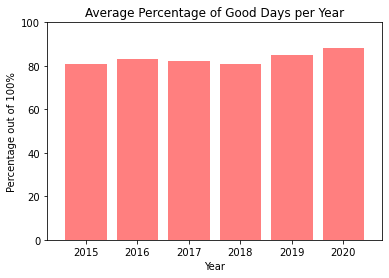

In [54]:
#Create Bar Chart of Average Percents
# Create an array that contains the percentage of each year
percentages = [81, 83, 82, 81, 85, 88]
x_axis = np.arange(len(percentages))

# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, percentages, color='r', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["2015", "2016", "2017", "2018", "2019", "2020"])

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(percentages)+12)

# Give our chart some labels and a tile
plt.title("Average Percentage of Good Days per Year")
plt.xlabel("Year")
plt.ylabel("Percentage out of 100%")
plt.savefig("Images/Average_good_days.png")

In [55]:
# Comparing the top 5 most populous states
#Group the DF by state and find the average percentage of that state
pctXstate_2015 = GoodDays_2015_df.groupby("State")["Percent of Good Days"].mean()
pctXstate_2015_df = pd.DataFrame(pctXstate_2015)

pctXstate_2016 = GoodDays_2016_df.groupby("State")["Percent of Good Days"].mean()
pctXstate_2016_df = pd.DataFrame(pctXstate_2016)

pctXstate_2017 = GoodDays_2017_df.groupby("State")["Percent of Good Days"].mean()
pctXstate_2017_df = pd.DataFrame(pctXstate_2017)

pctXstate_2018 = GoodDays_2018_df.groupby("State")["Percent of Good Days"].mean()
pctXstate_2018_df = pd.DataFrame(pctXstate_2018)

pctXstate_2019 = GoodDays_2019_df.groupby("State")["Percent of Good Days"].mean()
pctXstate_2019_df = pd.DataFrame(pctXstate_2019)

pctXstate_2020 = GoodDays_2020_df.groupby("State")["Percent of Good Days"].mean()
pctXstate_2020_df = pd.DataFrame(pctXstate_2020)

#print(pctXstate_2019_df)

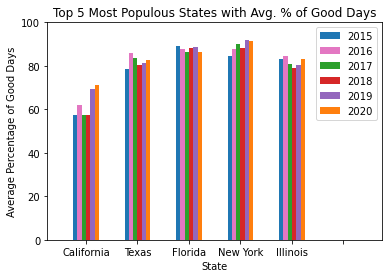

In [56]:
stateXpct_plot = pd.DataFrame({
    "2015" : [57.20, 78.60, 89.21, 84.38, 83.24],
    "2016" : [61.95, 85.81, 87.84, 87.84, 84.32],
    "2017" : [57.56, 83.39, 86.45, 90.02, 80.83],
    "2018" : [57.53, 80.51, 88.28, 88.02, 79.17],
    "2019" : [69.16, 81.13, 88.74, 91.89, 80.59],
    "2020" : [71.32, 82.62, 86.32, 91.39, 83.23]},
    index=["California", "Texas", "Florida", "New York", "Illinois"])


stateXpct_plot.plot(kind="bar", color = ['tab:blue','tab:pink','tab:green', 'tab:red', 'tab:purple', 'tab:orange'] )
plt.title("Top 5 Most Populous States with Avg. % of Good Days")
plt.xlabel("State")
plt.ylabel("Average Percentage of Good Days")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(percentages)+12)

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["California", "Texas", "Florida", "New York", "Illinois"],  rotation="horizontal")
plt.savefig("Images/5_Populous_states_Good_Days.png")

In [57]:
# Alex's Code Ends Here

In [58]:
# Rachel's Code Starts Here

In [59]:
# Moderate Days data by County/State for each year
# Extract columns: "State", "County", "Year", "Days with AQI", "Moderate Days"
# 2015
ModerateDays_2015_df = aqi_2015_df[["State", "County", "Year", "Days with AQI", "Moderate Days"]]

# 2016
ModerateDays_2016_df = aqi_2016_df[["State", "County", "Year", "Days with AQI", "Moderate Days"]]

# 2017
ModerateDays_2017_df = aqi_2017_df[["State", "County", "Year", "Days with AQI", "Moderate Days"]]

# 2018
ModerateDays_2018_df = aqi_2018_df[["State", "County", "Year", "Days with AQI", "Moderate Days"]]

# 2019
ModerateDays_2019_df = aqi_2019_df[["State", "County", "Year", "Days with AQI", "Moderate Days"]]

# 2020
ModerateDays_2020_df = aqi_2020_df[["State", "County", "Year", "Days with AQI", "Moderate Days"]]


In [60]:
# CO Days data by County/State for each year
# Extract columns: "State", "County", "Year", "Days with AQI", "Moderate Days"

# 2015
DaysCO_2015_df = aqi_2015_df[["State", "County", "Year", "Days with AQI", "Days CO"]]

# 2016
DaysCO_2016_df = aqi_2016_df[["State", "County", "Year", "Days with AQI", "Days CO"]]

# 2017
DaysCO_2017_df = aqi_2017_df[["State", "County", "Year", "Days with AQI", "Days CO"]]

# 2018
DaysCO_2018_df = aqi_2018_df[["State", "County", "Year", "Days with AQI", "Days CO"]]

# 2019
DaysCO_2019_df = aqi_2019_df[["State", "County", "Year", "Days with AQI", "Days CO"]]

# 2020
DaysCO_2020_df = aqi_2020_df[["State", "County", "Year", "Days with AQI", "Days CO"]]

DaysCO_2020_df.head()


,State,County,Year,Days with AQI,Days CO
0,Alabama,Baldwin,2020,168,0
1,Alabama,Clay,2020,58,0
2,Alabama,DeKalb,2020,242,0
3,Alabama,Elmore,2020,149,0
4,Alabama,Etowah,2020,169,0


In [61]:
# Moderate Days Groupby
df15 = aqi_2015_df[['State','County','Year','Moderate Days','Days CO']].copy()
df16 = aqi_2016_df[['State','County','Year','Moderate Days','Days CO']].copy()
df17 = aqi_2017_df[['State','County','Year','Moderate Days','Days CO']].copy()
df18 = aqi_2018_df[['State','County','Year','Moderate Days','Days CO']].copy()
df19 = aqi_2019_df[['State','County','Year','Moderate Days','Days CO']].copy()
df20 = aqi_2020_df[['State','County','Year','Moderate Days','Days CO']].copy()


In [62]:
full_df = df15.merge(df16,how='outer').merge(df17,how='outer').merge(df18,how='outer').merge(df19,how='outer').merge(df20,how='outer')

In [63]:
grp = full_df.groupby(['Year','State','County']).sum()


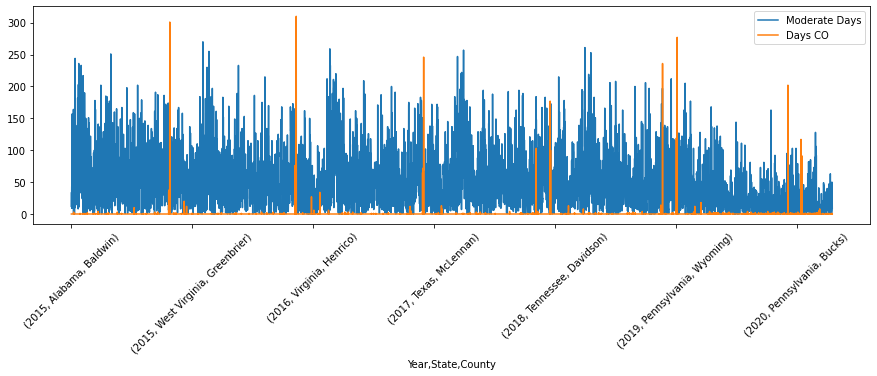

In [64]:
grp.plot(rot=45,figsize=(15,4))
plt.savefig("Images/Moderate_Days_and_Days_CO.png")

In [65]:
ny = full_df[full_df.State == 'New York']
ny_grp = ny.groupby('Year').sum()


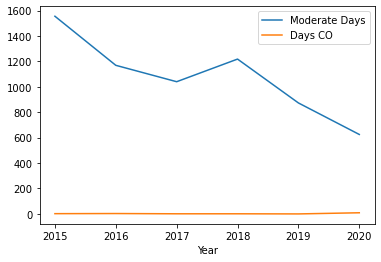

In [66]:
ny_grp.plot()
plt.savefig("Images/New_York_Moderate_Days.png")

In [67]:
# Rachel's Code Ends Here

In [68]:
#Hypothesis Testing Options


In [69]:
#Create new DF that has data organized by Year and Median AQI
AQI_hyp_test_df = aqi_all_df[["Year","Median AQI"]]
AQI_hyp_test_df.head()


,Year,Median AQI
0,2015,38
1,2015,32
2,2015,36
3,2015,37
4,2015,35


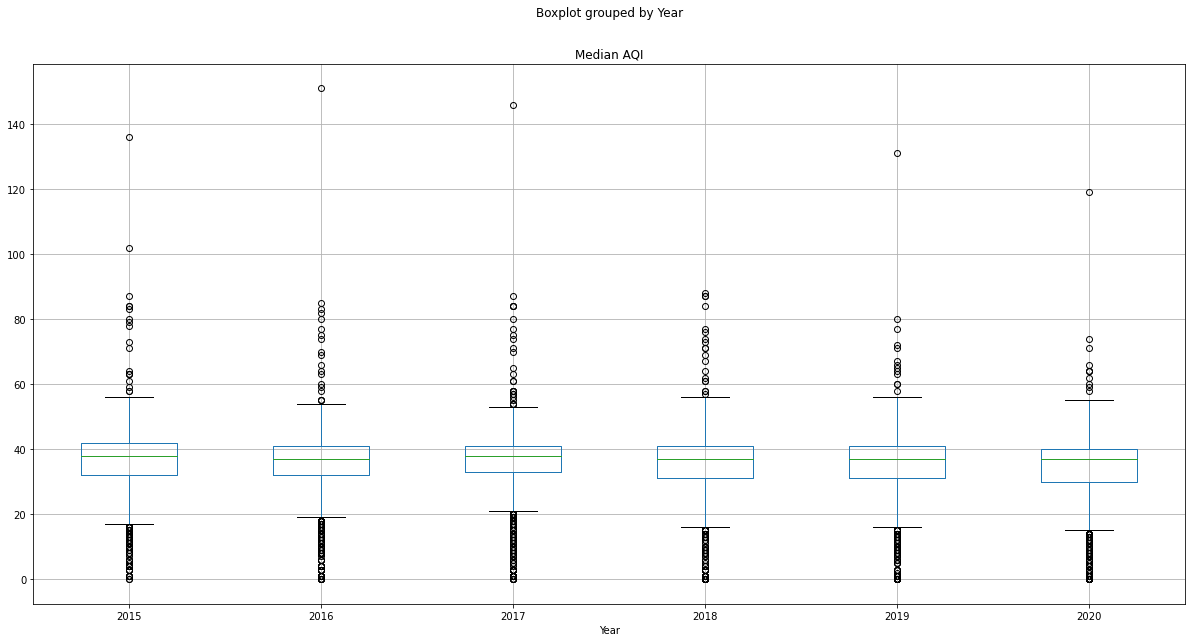

In [70]:
#Create a Box Plot and find p value for Median AQI data by Year. 
#Hypothesis = We would expect to see a lower Median AQI for 2020 then had been seen between 2015-2019
#Null Hypothesis = There is no difference between 2015-2019 data and 2020 data.
#Create a box plot to compare means
AQI_hyp_test_df.boxplot("Median AQI", by="Year", figsize=(20,10))
plt.savefig("Images/Boxplot_MedianAQI.png")

In [71]:
#Create indivudual groups to see data by year
group1 = AQI_hyp_test_df[AQI_hyp_test_df["Year"] == 2015]["Median AQI"]
group2 = AQI_hyp_test_df[AQI_hyp_test_df["Year"] == 2016]["Median AQI"]
group3 = AQI_hyp_test_df[AQI_hyp_test_df["Year"] == 2017]["Median AQI"]
group4 = AQI_hyp_test_df[AQI_hyp_test_df["Year"] == 2018]["Median AQI"]
group5 = AQI_hyp_test_df[AQI_hyp_test_df["Year"] == 2019]["Median AQI"]
group6 = AQI_hyp_test_df[AQI_hyp_test_df["Year"] == 2020]["Median AQI"]

In [72]:
#Perform the Anova & Get p Value for all years
stats.f_oneway(group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=7.1342902515564175, pvalue=1.1526508094675636e-06)

In [73]:
#Perform the Anova & Get P Value for all years without 2020 to see if p Value decreases
stats.f_oneway(group1, group2, group3, group4, group5) 

F_onewayResult(statistic=2.62277322156948, pvalue=0.03303654399136626)

In [74]:
#You can reject the null hypothesis when you take out 2020 data, but in doing so kind of defeat the purpose of analyzing this data set

In [75]:
#Create new DF that has data organized by Year and Days with Ozone as the main pollutant
Ozone_hyp_test_df = aqi_all_df[["Year","Days Ozone"]]
Ozone_hyp_test_df.head()

,Year,Days Ozone
0,2015,189
1,2015,0
2,2015,195
3,2015,307
4,2015,233


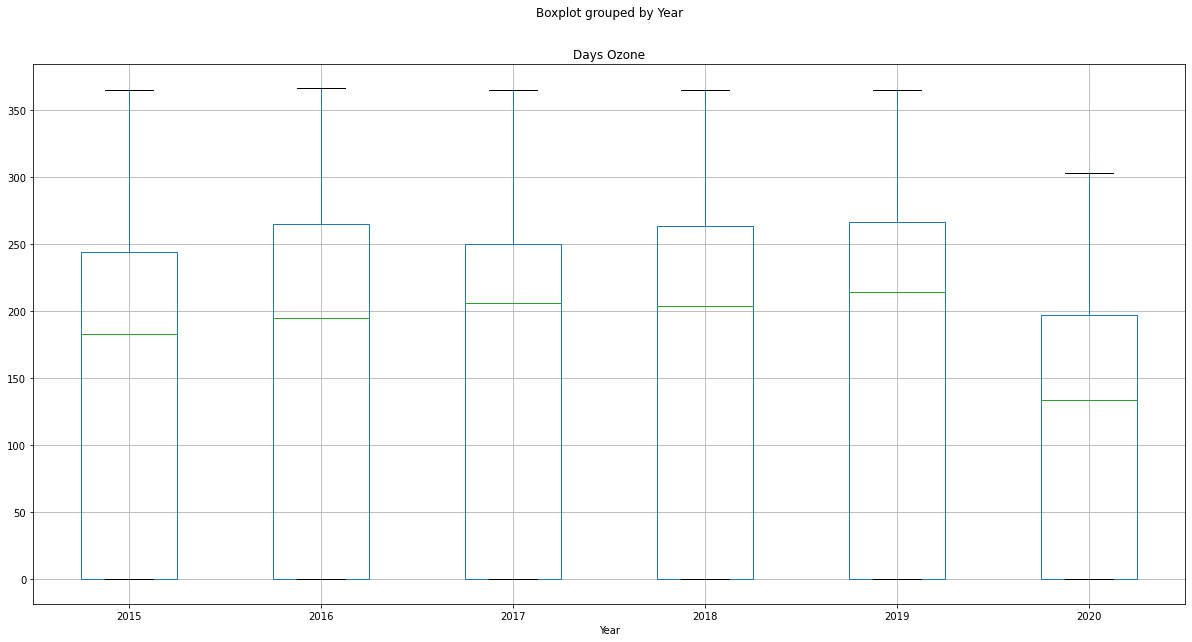

In [76]:
#Create a Box Plot and find p value for Ozone Days data by Year. 
#Hypothesis = We would expect to see a less Ozone pollutant days in 2020 than we would between 2015-2019
#Null Hypothesis = There is no difference between 2015-2019 data and 2020 data.
#Create a box plot to compare means
Ozone_hyp_test_df.boxplot("Days Ozone", by="Year", figsize=(20,10))
plt.savefig("Images/Boxplot_DaysOzone.png")

In [77]:
#Create indivudual groups to see data by year
group7 = Ozone_hyp_test_df[Ozone_hyp_test_df["Year"] == 2015]["Days Ozone"]
group8 = Ozone_hyp_test_df[Ozone_hyp_test_df["Year"] == 2016]["Days Ozone"]
group9 = Ozone_hyp_test_df[Ozone_hyp_test_df["Year"] == 2017]["Days Ozone"]
group10 = Ozone_hyp_test_df[Ozone_hyp_test_df["Year"] == 2018]["Days Ozone"]
group11 = Ozone_hyp_test_df[Ozone_hyp_test_df["Year"] == 2019]["Days Ozone"]
group12 = Ozone_hyp_test_df[Ozone_hyp_test_df["Year"] == 2020]["Days Ozone"]

In [78]:
#Perform the Anova & Get p Value for all years
stats.f_oneway(group7, group8, group9, group10, group11, group12)

F_onewayResult(statistic=37.39500577230569, pvalue=6.439560173571863e-38)

In [79]:
#Perform the Anova & Get P Value for all years without 2020 to see if p Value decreases
stats.f_oneway(group7, group8, group9, group10, group11) 

F_onewayResult(statistic=2.2365375611543237, pvalue=0.062609821146839)

In [80]:
#Could not reject null hypothesis

In [81]:
#Create new DF that has data organized by Year and amount of Good Days
Gday_hyp_test_df = aqi_all_df[["Year","Good Days"]]
Gday_hyp_test_df.head()

,Year,Good Days
0,2015,230
1,2015,101
2,2015,251
3,2015,319
4,2015,223


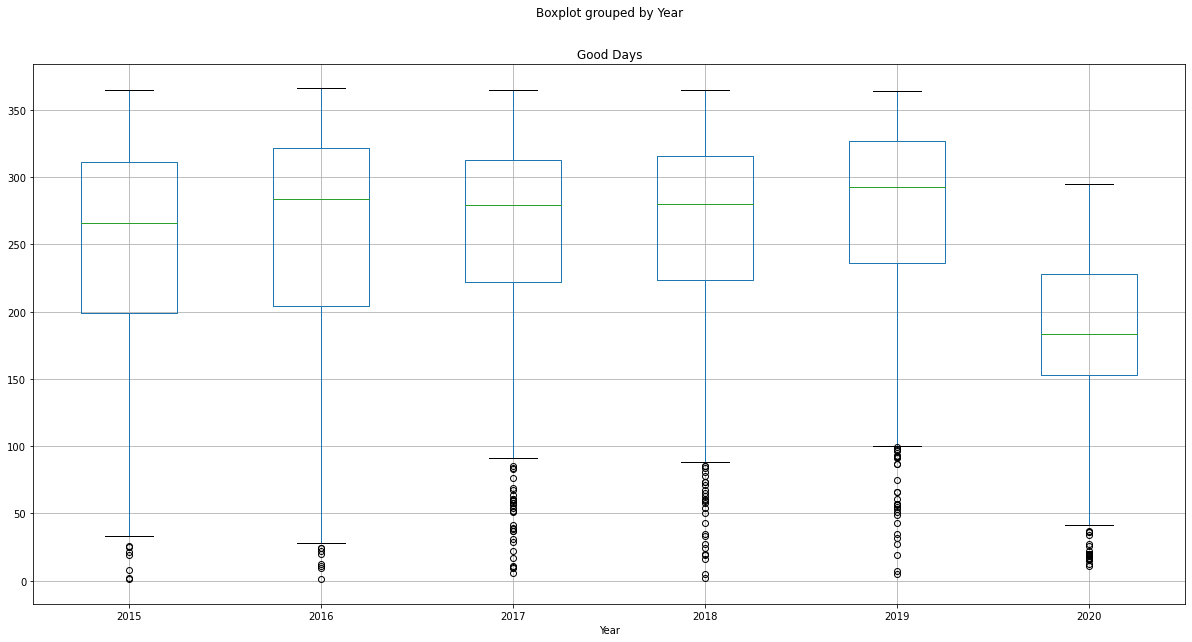

In [82]:
#Create a Box Plot and find p value for Number of Good Days data by Year. 
#Hypothesis = We would expect to see a more Good Days in 2020 than we would between 2015-2019
#Null Hypothesis = There is no difference between 2015-2019 data and 2020 data for the amount of Good Days.
#Create a box plot to compare means
Gday_hyp_test_df.boxplot("Good Days", by="Year", figsize=(20,10))
plt.savefig("Images/Boxplot_GoodDays.png")

In [83]:
#Create indivudual groups to see data by year
group12 = Gday_hyp_test_df[Gday_hyp_test_df["Year"] == 2015]["Good Days"]
group13 = Gday_hyp_test_df[Gday_hyp_test_df["Year"] == 2016]["Good Days"]
group14 = Gday_hyp_test_df[Gday_hyp_test_df["Year"] == 2017]["Good Days"]
group15 = Gday_hyp_test_df[Gday_hyp_test_df["Year"] == 2018]["Good Days"]
group16 = Gday_hyp_test_df[Gday_hyp_test_df["Year"] == 2019]["Good Days"]
group17 = Gday_hyp_test_df[Gday_hyp_test_df["Year"] == 2020]["Good Days"]

In [84]:
#Perform the Anova & Get p Value for all years
stats.f_oneway(group12, group13, group14, group15, group16, group17)

F_onewayResult(statistic=209.98176397958815, pvalue=8.930666092585843e-208)

In [85]:
#Perform the Anova & Get p Value for all years
stats.f_oneway(group12, group13, group14, group15, group16)

F_onewayResult(statistic=13.82069695402736, pvalue=3.2398379188157295e-11)

In [86]:
#There is a slight discrepency in this dataset. Look below for explanation


In [87]:
#Create new DF that has data organized by Year and Days with Ozone as the main pollutant
AQIno_hyp_test_df = aqi_all_df[["Year","Days with AQI"]]
AQIno_hyp_test_df.head()

,Year,Days with AQI
0,2015,264
1,2015,112
2,2015,280
3,2015,363
4,2015,233


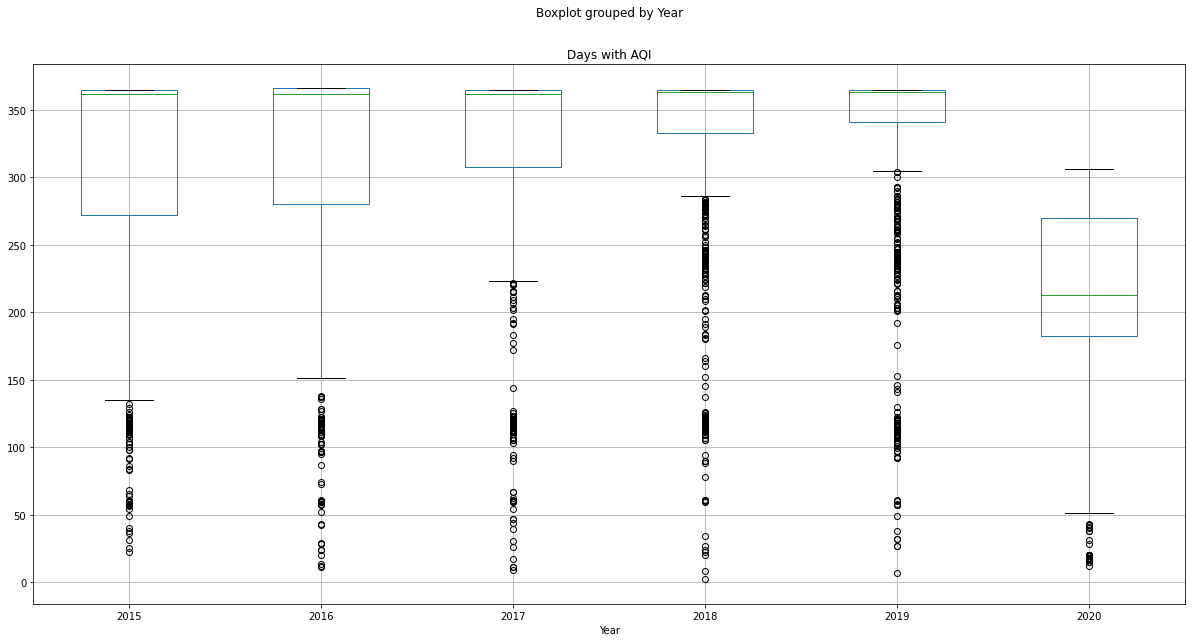

In [88]:
#Create a box plot to compare means
AQIno_hyp_test_df.boxplot("Days with AQI", by="Year", figsize=(20,10))
plt.savefig("Images/Boxplot_DayswAQI.png")

In [89]:
#As you can see 2020 had less recorded Days with AQI, therefore don't have an accurate 
#representation in the previous test showing the amount of good days

In [90]:
#No statistical significance has been indicated